In [23]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [24]:
datafile = np.load('data.npz')
datafile.files

['data']

In [25]:
data = datafile['data']

In [4]:
# the full dataset has lots of values. but for the interest of this demo,
# let's assume that we don't observe all of them!
data.shape

(95680,)

In [26]:
# the "True" average firing rate of the neuron
data.mean()

0.02114339464882943

In [27]:
# instead, assume we only observe 10% of these data points
our_sample = data[::10]
our_sample.shape

(9568,)

In [28]:
our_sample.mean()

0.02309782608695652

In [32]:
np.random.randint(0, len(our_sample))

6735

In [34]:
# choose random datapoints from our_sample to construct a bootstrap sample
bootstrap_sample_1 = []
for ii in range(len(our_sample)):
    # choose a random index
    rand_index = np.random.randint(0, len(our_sample))
    # append that element from our_sample to bootstrap_sample_1
    bootstrap_sample_1.append(our_sample[rand_index])

print(len(bootstrap_sample_1))

9568


In [37]:
bootstrap_sample_1[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

In [38]:
bootstrap_sample_1.mean()

AttributeError: 'list' object has no attribute 'mean'

In [39]:
np.mean(bootstrap_sample_1)

0.020275919732441472

In [42]:
# number of possible bootstrap samples
9568 ** 9568

3139947979231883914437317668836268668667220360527070325427273800524862841087142018659764794254173779498063227658864961108177742863458208588623571492488134563465833508046749948633515619227463929579718821424319635170764091066734646389870625252037497530309470392221458984217090641919219519540429164533701646206114463087210492846252085584929381015816571193412866059947180136711040342440558952383526490383395638576927498472324916024998057443429524415348429644887508365806382351416845444309342404600285860869683887234191398376853818498612623270944818874370416692954292595750850363495810484524587309506513876072754259464050083097575127730973445986337532656439384040829350718116928303259744841679767406866180365104907154771380970318450816904517387595908927026716212345465294621108533225791190668005783425300283055219050704272912030833099700423124182569780650765027206593304982851984840267561551412762802171952840317843435233275163889692746483077530260333369878548272495870808523070773363378353827933493830098

In [44]:
# let's use a better method to generate bootstrap samples
np.random.choice?

In [46]:
bootstrap_sample_2 = np.random.choice(our_sample, size=len(our_sample))
print(len(bootstrap_sample_2))
print(bootstrap_sample_2.mean())

9568
0.023202341137123744


In [49]:
# let's generate 10000 bootstrap samples
bootstrap_means = np.array([np.random.choice(our_sample, size=len(our_sample)).mean() 
                            for _ in range(10000)])

In [50]:
bootstrap_means[:10]

array([0.02278428, 0.02226171, 0.02477007, 0.02194816, 0.02320234,
       0.02508361, 0.02372492, 0.02309783, 0.02173913, 0.02236622])

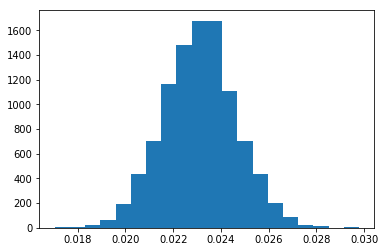

In [51]:
# let's first look at the histogram
plt.hist(bootstrap_means, bins=20);

In [52]:
bootstrap_means.mean() # close to sample mean

0.023103417642140467

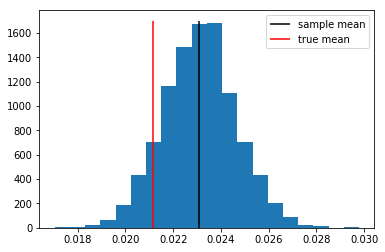

In [55]:
# let's add the sample mean and the "true" mean
plt.hist(bootstrap_means, bins=20);
plt.vlines(our_sample.mean(), 0, 1700, 'k', label="sample mean");
plt.vlines(data.mean(), 0, 1700, 'r', label="true mean");
plt.legend()

In [56]:
# let's compute a 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(confidence_interval)

[0.0201714  0.02612876]


In [57]:
# the true mean:
data.mean()

0.02114339464882943

In [58]:
# compute the standard error
bootstrap_means.std()

0.0015409043344641947

In [59]:
# analytic standard error for Bernoulli RV
np.sqrt(our_sample.mean() * (1 - our_sample.mean()) / len(our_sample))

0.0015356792219616573